<a href="https://colab.research.google.com/github/faznafathima/__PROJECTS__/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt same as above matplotlib import
import seaborn as sns

In [ ]:
#Reading the data using pandas library(data from a CSV file into a Pandas DataFrame)
data=pd.read_csv(r'/content/drive/MyDrive/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
print("Shape of data is :",data.shape)

Shape of data is : (418, 12)


Titanic dataset has 418 rows x 12 columns with Age, Cabin, Fare having 86, 327, 1 missing values respectively.

From the dataset, it is clear that:

1) Survived column is the target variable or class label. The target variable is the feature that needs to be predicted by our models.

2) Categorical type :  Name, Sex, Ticket, Cabin, Embarked. 
No null values

3) Numerical type: Age and Fare.

4) The shape of data is (418,12) means in our data set we have 418 rows and 12 columns. Each row has info about a passenger so totally we have data of 418 passengers.

5) out of 418, 266 dead and 152 survived.

6) The columns that can be dropped are: 
PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. 
Age, Fare: Instead, the respective range columns are retained.

In [ ]:
#Check the type of data
type(data)

pandas.core.frame.DataFrame

In [ ]:
#Basic Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**5 columns are categorical type :  Name, Sex, Ticket, Cabin, Embarked. 
No null values**

In [ ]:
#To get the Statistical Insight use describe()
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**For numerical parameters, fields like mean, standard deviation, percentiles, and maximum have been populated. For categorical features, count, unique, top (most frequent value), and corresponding frequency have been populated. This gives us a broad idea of our dataset.**

In [ ]:
#To see the data head part
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
#To see the tail part (by default head and tail shows five rows)
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#To see how many survived(1) and not survived(0) are there in data
data["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Thus, there are 86 missing values in Age, 1 missing value in Fare and 327 missing values in Cabin.**

In [ ]:
#Show which entries in a DataFrame are NA and False values shows no NA values
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

In [ ]:
data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [ ]:
data["Fare"].fillna(data["Fare"].mean(),inplace=True)

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

In [ ]:
data.drop('Name',axis=1,inplace=True)

In [ ]:
data.drop('Ticket',axis=1,inplace=True)

In [ ]:
data.drop('PassengerId',axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**UNIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


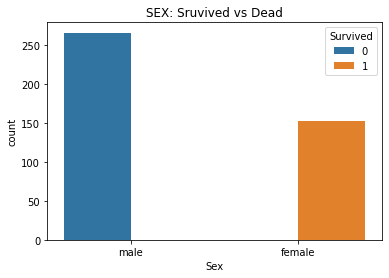

In [ ]:
sns.countplot('Sex', hue='Survived', data=data) 
plt.title('SEX: Sruvived vs Dead')
plt.show()

**From the above graph it is clear that not many persons survived. Out of 418 persons in training dataset only 152, 36.3% of total training dataset survived.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


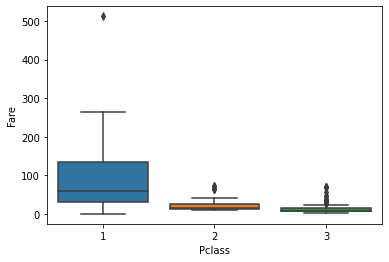

In [ ]:
sns.boxplot('Pclass','Fare',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


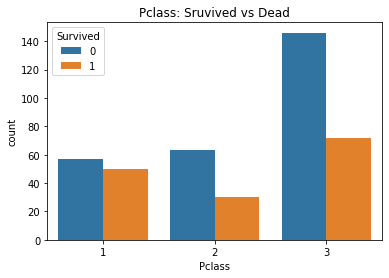

In [ ]:
sns.countplot('Pclass', hue='Survived', data=data)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

**It is clearly seen that passengers of Class 1 are given
high priority while Rescue. There are greater number of passengers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survival and non-survival rate is 30% and 64% approx. While in Class 1 almost 68% people survived.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


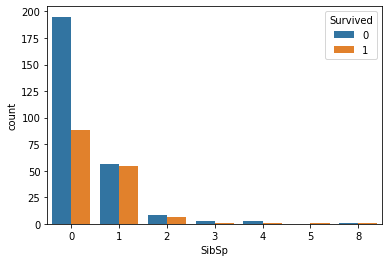

In [ ]:
sns.countplot(data["SibSp"],hue = data["Survived"],data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


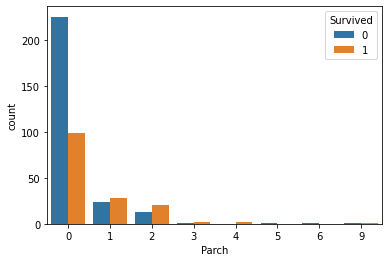

In [ ]:
sns.countplot(data["Parch"],hue = data["Survived"],data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


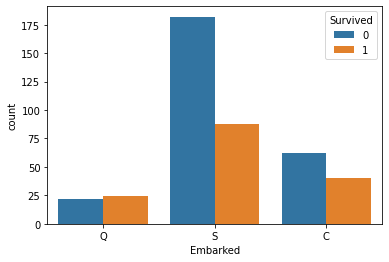

In [ ]:
sns.countplot(data["Embarked"],hue = data["Survived"],data = data)

**BIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/

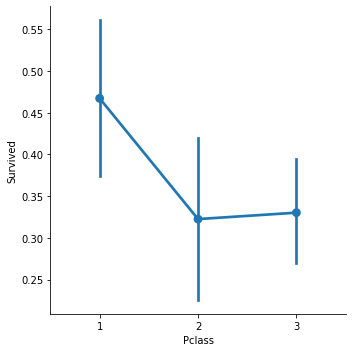

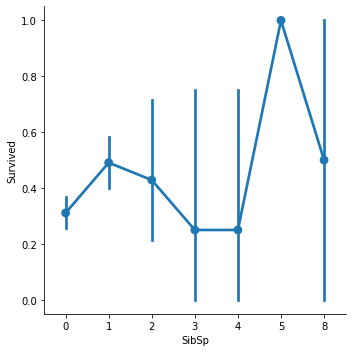

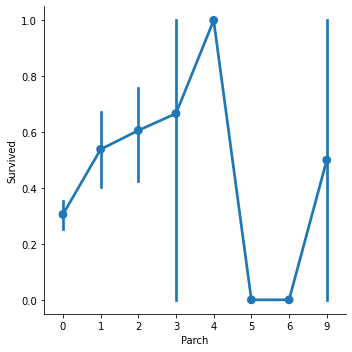

In [ ]:
sns.factorplot('Pclass','Survived',data=data)
sns.factorplot('SibSp','Survived',data=data)
sns.factorplot('Parch','Survived',data=data)


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


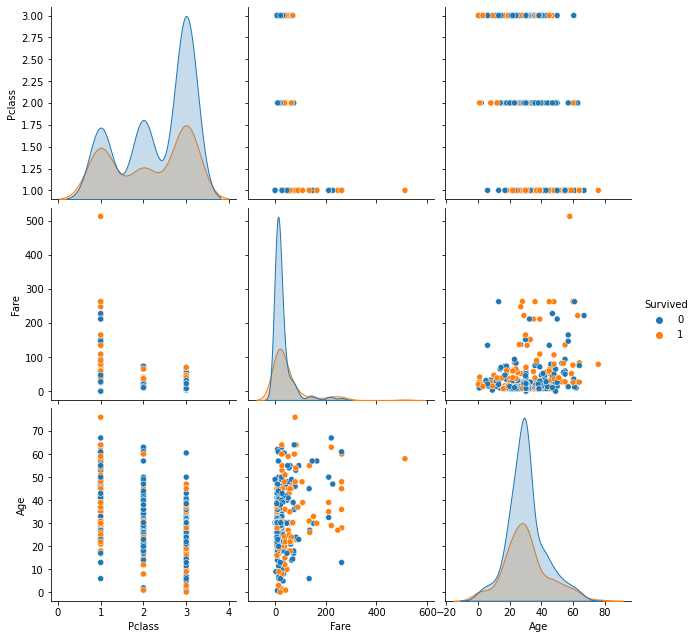

In [ ]:
sns.pairplot(data[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

X**DATA INSIGHTS :**

1) Passengers who paid higher fares or traveling in the upper class have a higher chance to survive and those who travelled in the lower calss ie., with  low fare have a higher chance to die.

2) Age is also giving some info like young persons have a higher chance to survive than old peoples.

3) Persons who were traveling in 2nd class and 3rd class, most of them died or can not survived than other class passengers.
Persons who were traveling in 1st class, a large number of people survived and also a fair number of persons died.
So as the conclusion we can say that person who was traveling in lower class like 3rd has higher chances to die & persons who were traveling in higher class like 1st has higher chance to survive.

4) Passengers who have 0 siblings mostly of them died.
Passengers with 1 sibling have an equal chance to both die and survive.
Passengers who have a higher number of siblings like 3, 4, 5, 8 have a very low chance to survive or almost 0% chance to survive.

5) Parch also has the same analysis as SibSp.

6) Passengers who started his journey from Southampton, most of them died and also the number of persons died is somewhat more for those who started journey from Cherbourg. There is not much difference in people surviving or die chances who started their journey from Queenstown.